<a href="https://colab.research.google.com/github/anas1IA/Windows_attack10/blob/main/project/TON_IoT_Attack_Windows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TON-IoT Attack Windows 10

In [2]:
# import important libraries :

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [4]:
df = pd.read_csv("/content/Train_Test_Windows_10 (1).csv")

## Understand the Dataset :

In [5]:
df.head(10)

,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,Processor_pct_ DPC_Time,...,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label,type
0,0,49.07244938,0,0.779671928,0,21.830814,49.07244938,45.5788994,405.2109934,0.155934386,...,0.035543669,0.035727836,0.006138575,980725.4671,61.12065428,16125.91191,1.184788963,0.000584015,1,dos
1,17,0,0,1.170522789,0,38.15904291,0,100,0,2.41908043,...,0.071868506,0.113428645,1.38968492,695437.4911,56.84042385,17923.5993,2.403132421,0.001995776,1,dos
2,11,0,0,0.546510062,0,65.1127703,0,100,0,0.312291464,...,0.010271601,0.023255341,0.432790999,691341.4197,9.388015072,86462.6383,0.342387367,0.002475624,1,dos
3,0,0,0,0.78081667,0,68.94611198,0,100,0,1.015061671,...,0.062088903,0.070302274,0.273779061,1039903.208,81.89439351,13206.97436,2.069629418,0.000858868,1,dos
4,0,0,0,0.468739969,0,66.0142123,0,100,0,0.156246656,...,0.100304043,0.123923448,0.787313151,2498188.869,190.1717481,15214.36803,3.34346845,0.000651557,1,dos
5,0,0,0,0.850670758,0,72.30701444,0,100,0,0.077333705,...,0.004767983,0.012070027,0.243401465,284270.6052,7.227312748,42271.56164,0.158932767,0.001670347,1,dos
6,2,0,0,1.718765039,0,57.73488018,0,100,0,0.781256836,...,0.185050279,0.287074862,3.400818757,2605890.835,340.00204,14482.07059,6.168342973,0.00084433,1,dos
7,1,0,0,1.953685004,0,53.21837952,0,100,0,0.547031801,...,0.270206362,0.369339437,3.304436184,2656634.863,353.5049167,12440.55688,9.006878732,0.001044804,1,dos
8,2,0,0,1.642300541,0,51.22413591,0,100,0,1.32948139,...,0.151404359,0.197130981,1.524221071,1319853.812,198.002737,11618.87968,5.046811959,0.000995601,1,dos
9,5,0,0,2.110519704,0,52.76299259,0,100,0,0.859841361,...,0.198902501,0.228856577,0.998468549,910622.4899,111.3600799,11956.78706,6.630083024,0.002055098,1,dos


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21104 entries, 0 to 21103
Columns: 126 entries, Processor_DPC_Rate to type
dtypes: float64(5), int64(51), object(70)
memory usage: 20.3+ MB


In [7]:
df.describe()

,Processor_DPC_Rate,Process_Pool_Paged Bytes,Process_Working_Set_ Private,Process_Working_Set_Peak,Process_Page_File Bytes,Process_Virtual_Bytes Peak,Process_Page_File Bytes Peak,Process_Private_Bytes,Process_Elapsed_Time,Process_Virtual_Bytes,...,Memory Free System Page Table Entries,Memory Available MBytes,Memory Modified Page List Bytes,Memory Committed Bytes,Memory System Driver Total Bytes,Memory Pool Paged Resident Bytes,LogicalDisk(_Total) pct_ Free Space,LogicalDisk(_Total) Current Disk Queue Length,LogicalDisk(_Total) Free Megabytes,label
count,21104.000000,2.110400e+04,2.110400e+04,2.110400e+04,2.110400e+04,2.110400e+04,2.110400e+04,2.110400e+04,21104.0,2.110400e+04,...,2.110400e+04,21104.000000,2.110400e+04,2.110400e+04,2.110400e+04,2.110400e+04,21104.000000,21104.000000,21104.000000,21104.000000
mean,5.248531,2.644860e+07,1.336076e+09,5.241378e+09,2.799167e+09,2.053073e+14,3.971298e+09,2.799167e+09,0.0,2.053058e+14,...,1.887936e+08,737.823825,1.812951e+07,4.060319e+09,1.944758e+07,9.643204e+07,82.247000,0.119409,168315.345432,0.526156
std,16.786584,5.413629e+06,5.056969e+08,8.439561e+08,9.661999e+08,5.683334e+13,1.386291e+09,9.661999e+08,0.0,5.683525e+13,...,8.514641e+08,417.262817,3.018242e+07,9.627752e+08,3.490552e+06,5.105864e+07,2.204084,0.483882,4477.907475,0.499327
min,0.000000,7.733328e+06,2.281431e+08,2.926305e+09,7.229399e+08,8.360000e+13,1.577538e+09,7.229399e+08,0.0,8.360000e+13,...,1.215598e+07,4.000000,0.000000e+00,1.194230e+09,1.638400e+07,1.077248e+07,80.369681,0.000000,164487.000000,0.000000
25%,0.000000,2.232929e+07,9.345106e+08,4.616785e+09,2.147040e+09,1.550000e+14,2.962182e+09,2.147040e+09,0.0,1.550000e+14,...,1.221032e+07,473.000000,7.233536e+06,3.489622e+09,1.807974e+07,6.821069e+07,81.315138,0.000000,166422.000000,0.000000
50%,0.000000,2.779906e+07,1.357462e+09,5.275918e+09,2.564751e+09,2.490000e+14,3.636130e+09,2.564751e+09,0.0,2.490000e+14,...,1.226051e+07,621.000000,1.250099e+07,4.106883e+09,1.817805e+07,8.878490e+07,81.714330,0.000000,167239.000000,1.000000
75%,2.000000,3.068336e+07,1.701403e+09,5.868466e+09,3.258045e+09,2.560000e+14,4.476684e+09,3.258045e+09,0.0,2.560000e+14,...,1.226337e+07,900.000000,2.145485e+07,4.572972e+09,1.916518e+07,1.281690e+08,82.097399,0.000000,168022.000000,1.000000
max,195.000000,3.806623e+07,2.849071e+09,8.300409e+09,7.340392e+09,3.050000e+14,1.320974e+10,7.340392e+09,0.0,3.050000e+14,...,4.294967e+09,2742.000000,7.029146e+08,1.303494e+10,3.464806e+07,4.146299e+08,94.611408,8.000000,193451.000000,1.000000


#### convert to numeric values :
while exploring data we find that the feature `object` type are numerical values except the `target` is string format. so, let's convert all `object`features to numerical values :

In [8]:
df[df.columns[:-1]] = df[df.columns[:-1]].apply(pd.to_numeric, errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21104 entries, 0 to 21103
Columns: 126 entries, Processor_DPC_Rate to type
dtypes: float64(74), int64(51), object(1)
memory usage: 20.3+ MB


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
dfs = pd.DataFrame(scaler.fit_transform(df[df.columns[:-1]]), columns=df.columns[:-1])

In [204]:
def correlation(dataset, threshold):
    col_corr = set()
    # corr_matrix = dataset.corr()
    # for i in range(len(corr_matrix.columns)):
    #     for j in range(i):
    #         if abs(corr_matrix.iloc[i, j])> threshold:
    #             colname = corr_matrix.columns[i]
    #             col_corr.add(colname)

    for i in range(len(dataset.columns)):
      colname = dataset.columns[i]
      if len(dataset[colname].unique()) <= 2:
        col_corr.add(colname)
    return list(col_corr)

In [205]:
col_to_remove = correlation(dfs, 0.7)

In [206]:
dfs = dfs.drop(columns=col_to_remove)

The only object feture is the `type` feature.

### Exploratory Data Analysis (EDA):

### Data visualization :

#### Missing Values :

As we see the following plot gives as the ideas of present missing values :

<Axes: >

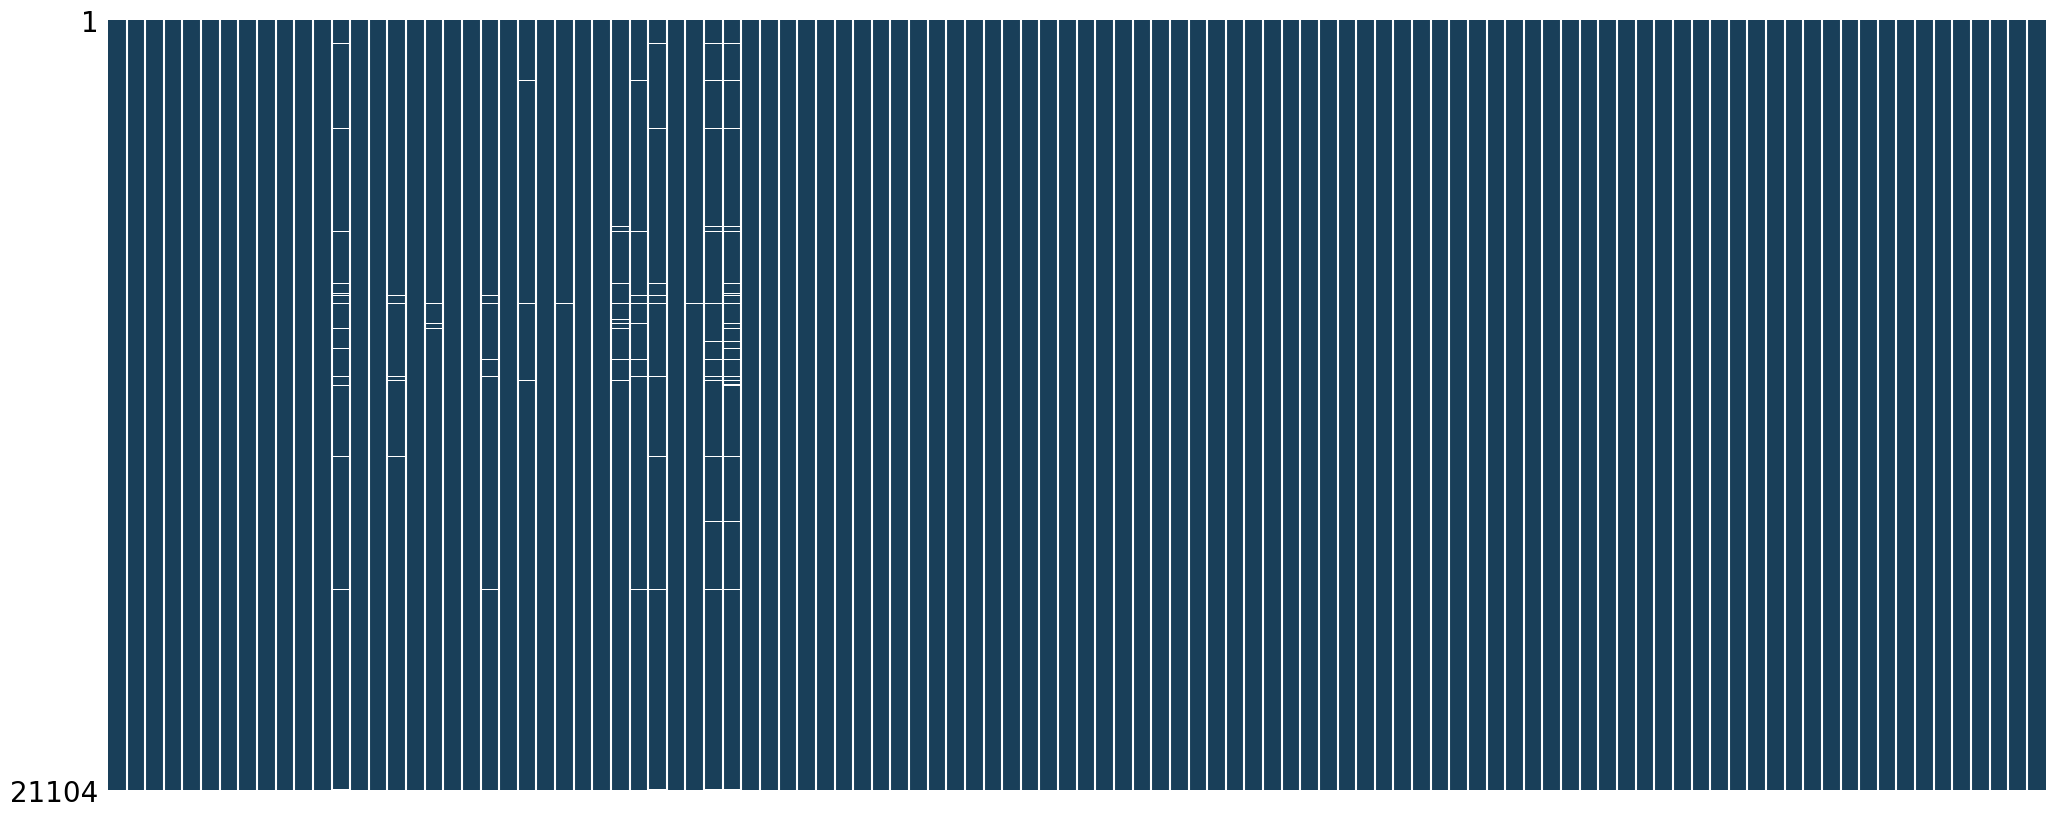

In [208]:
msno.matrix(dfs, sparkline=False, color=(0.1, 0.25, 0.35))

So, we observe that the missing values are located before the feature of index 50 :  

<Axes: >

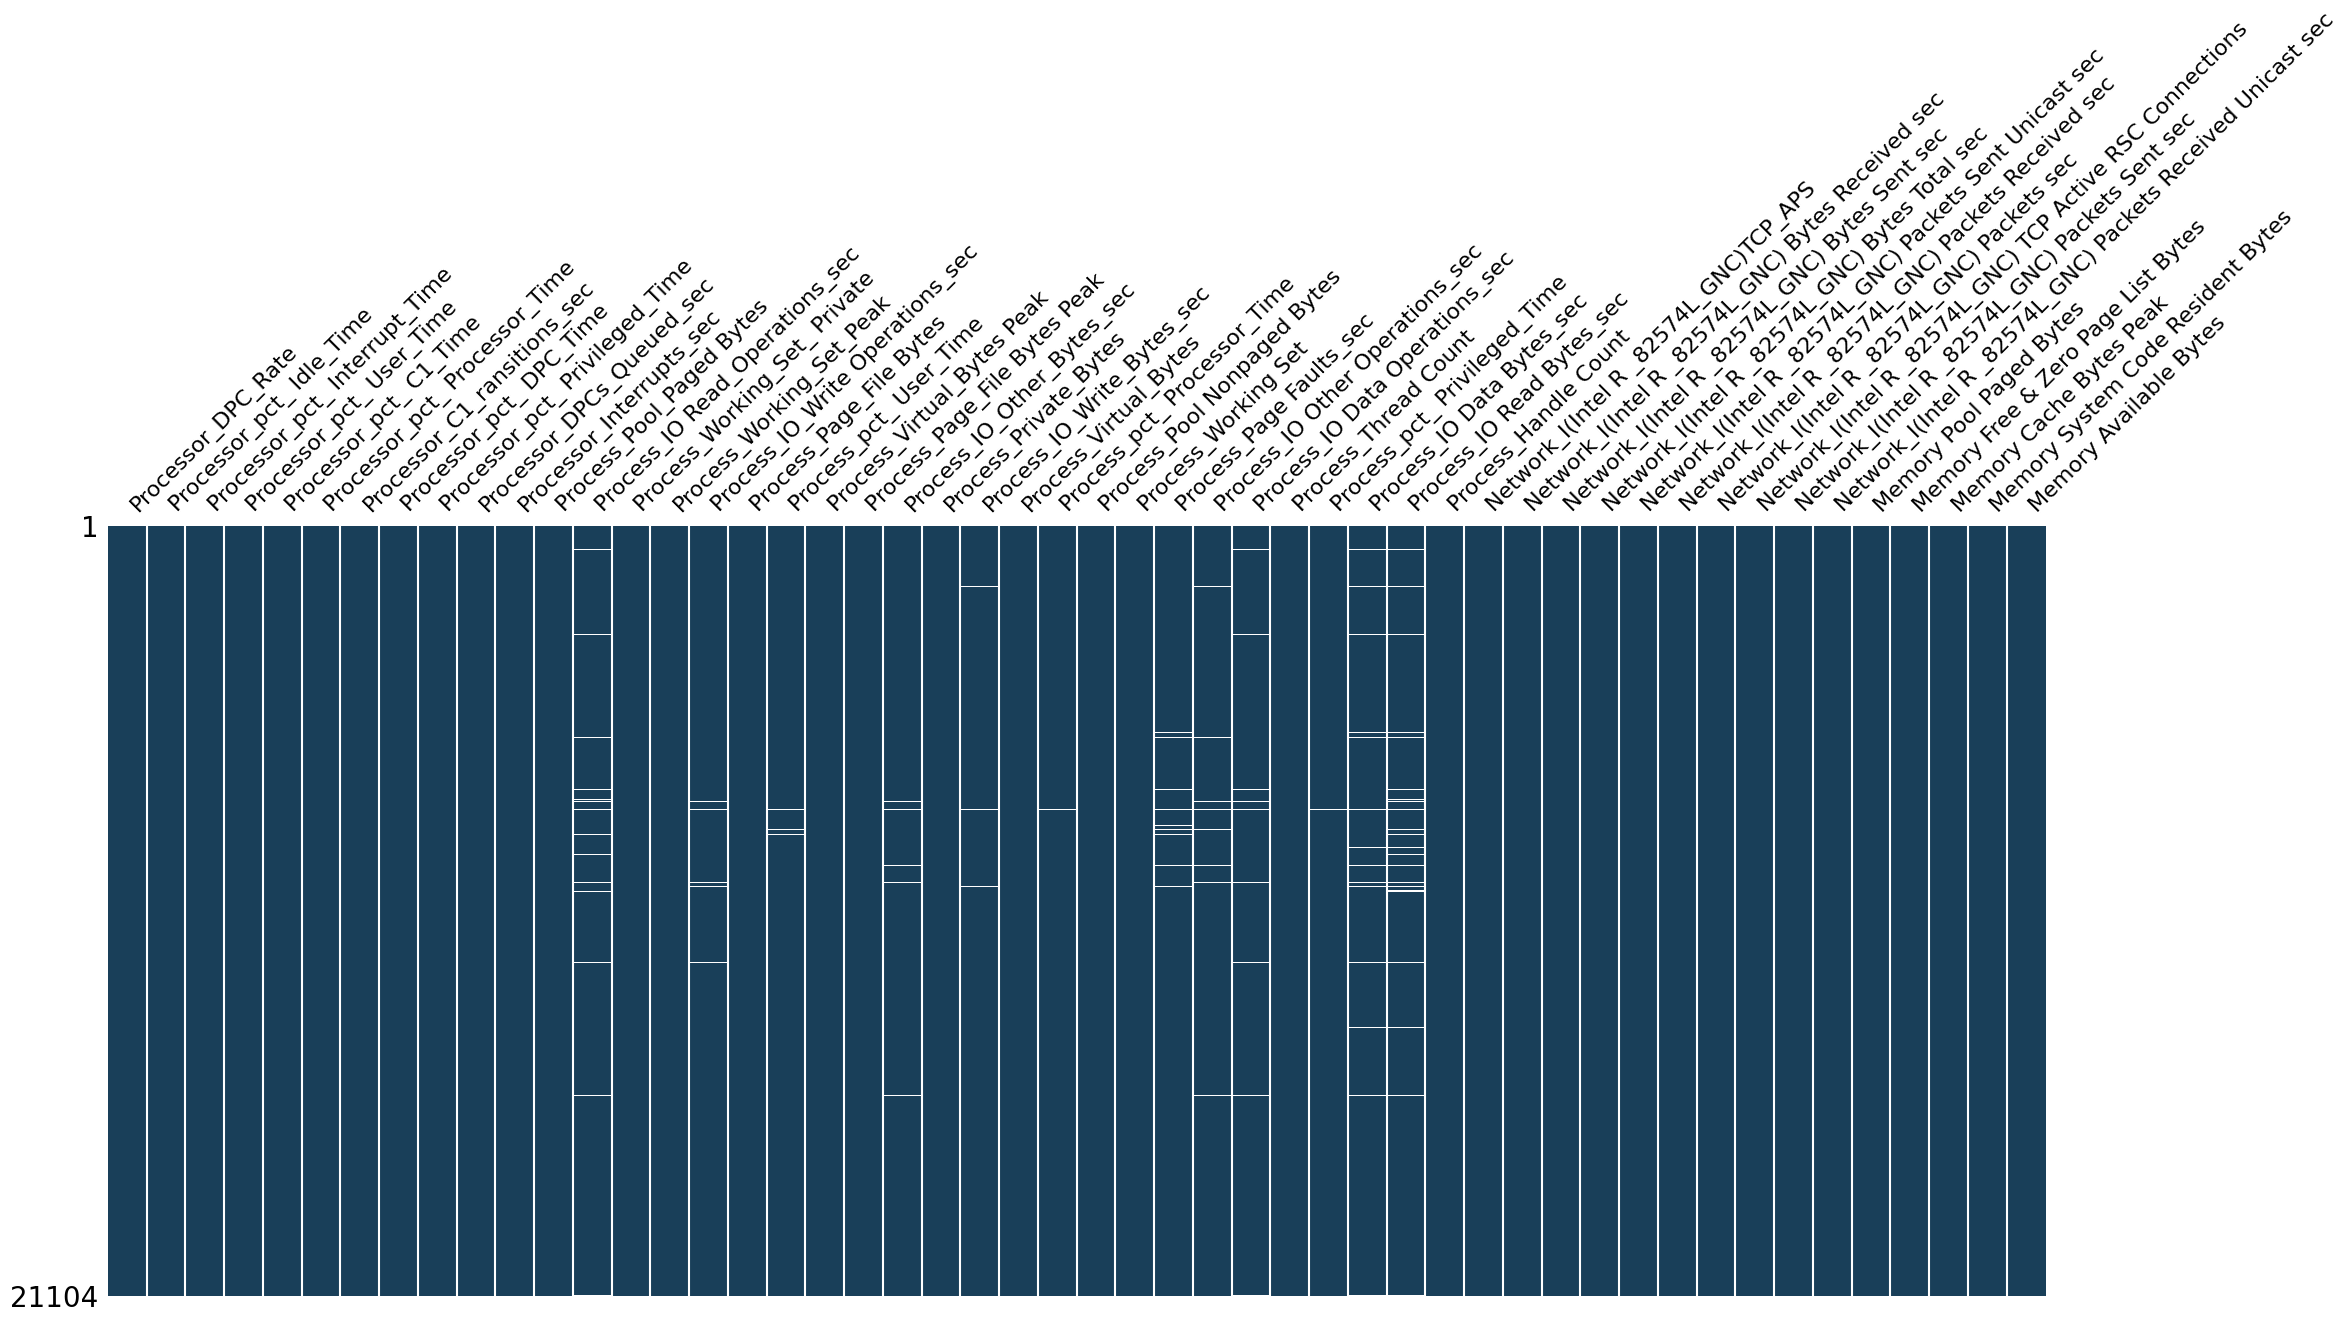

In [209]:
msno.matrix(dfs.iloc[:, 0:50], sparkline=False, color=(0.1, 0.25, 0.35))

### Conclusions :
As this figure shows, There a lot of features that have missing values.

### Outliers :

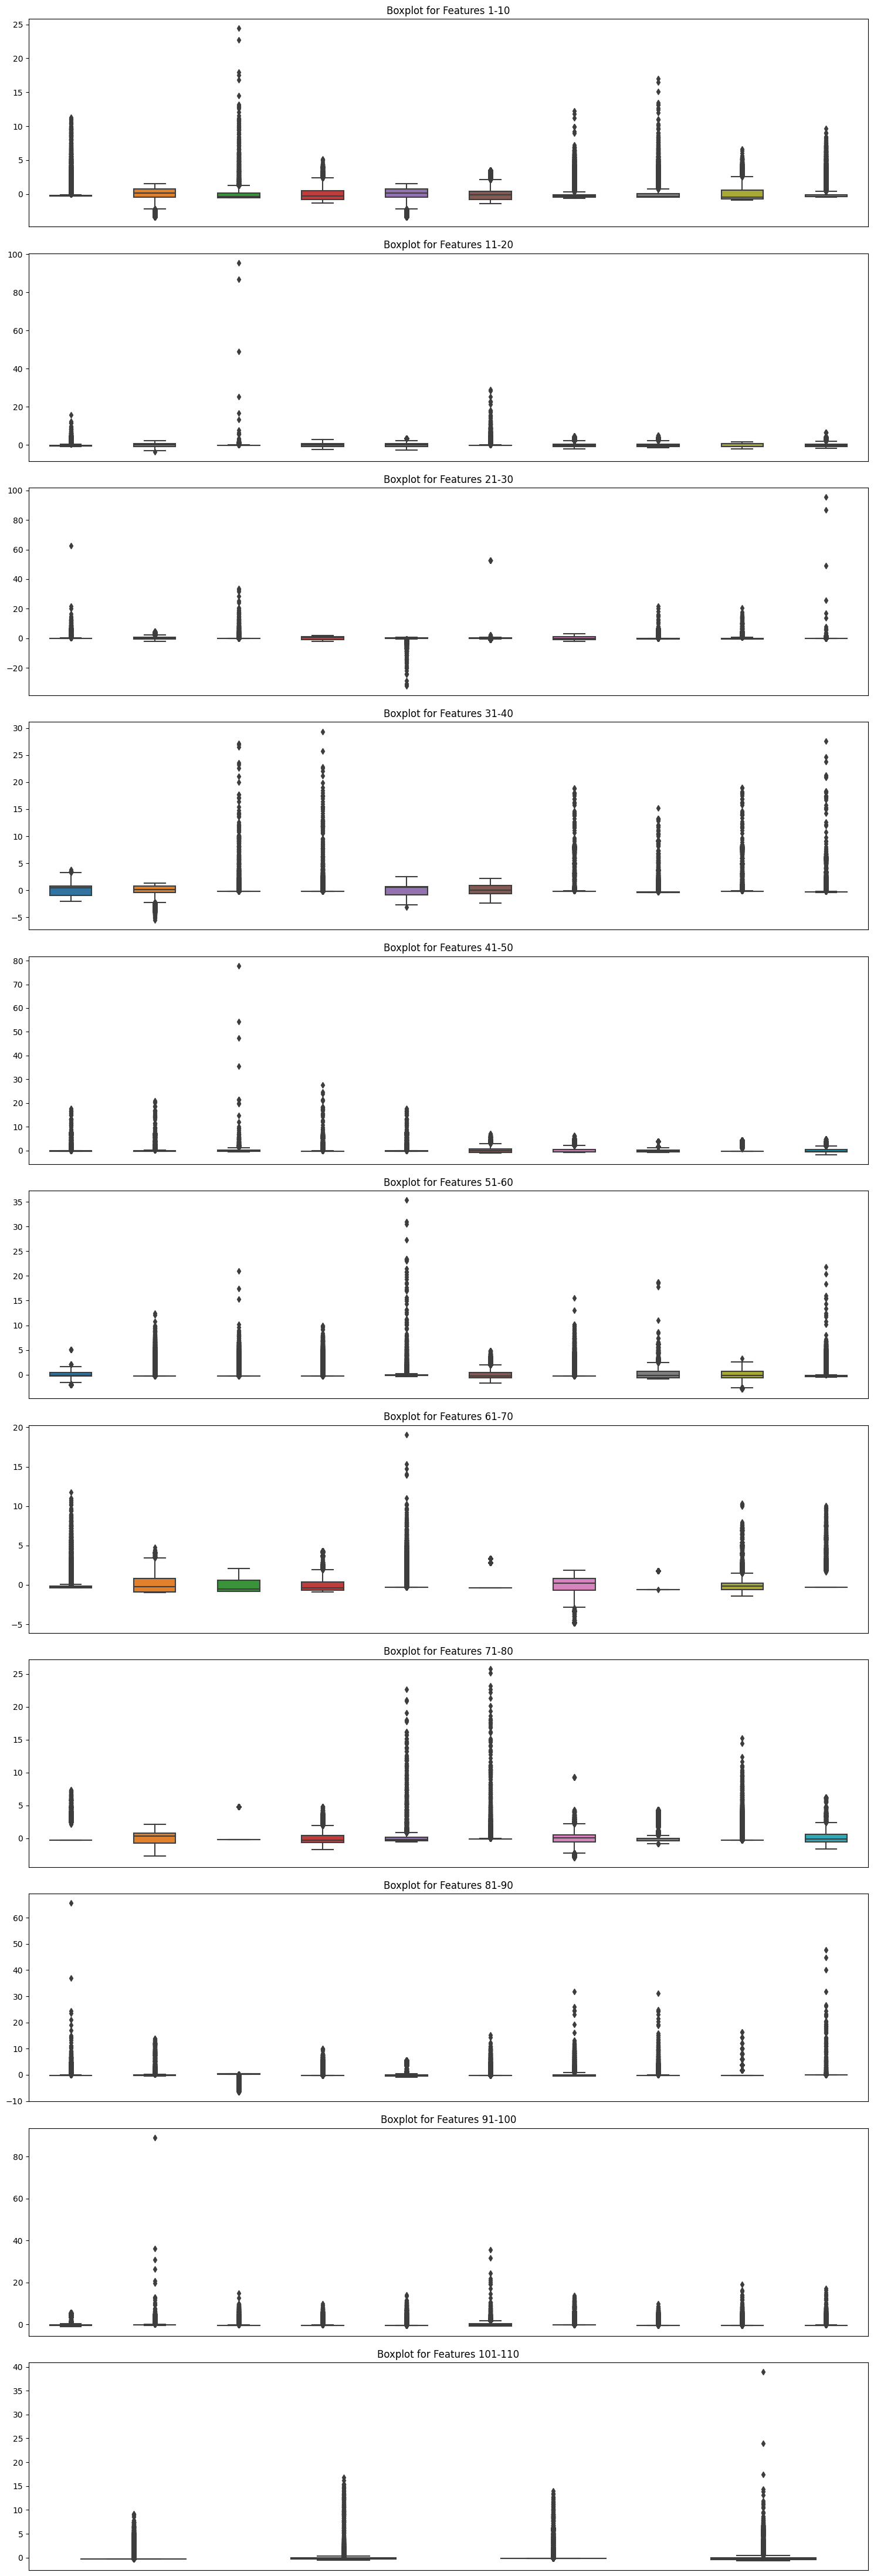

In [211]:
num_features = len(dfs.columns[:-1])
num_plots = 10

num_subplots = num_features // num_plots + (num_features % num_plots > 0)

plt.figure(figsize=(15, 4 * num_subplots))

for i in range(num_subplots):
    start_idx = i * num_plots
    end_idx = (i + 1) * num_plots

    plt.subplot(num_subplots, 1, i + 1)

    sns.boxplot(data=dfs.iloc[:, start_idx:end_idx], width=0.5)

    plt.xticks([])
    plt.title(f'Boxplot for Features {start_idx + 1}-{end_idx}')

plt.tight_layout()
plt.show()


> ### Conclusions :  
> As you see most of features have outliers, so the section of data cleaning and preprocessing we will deal remove them.

#### Corolations Matrix :  

<Axes: >

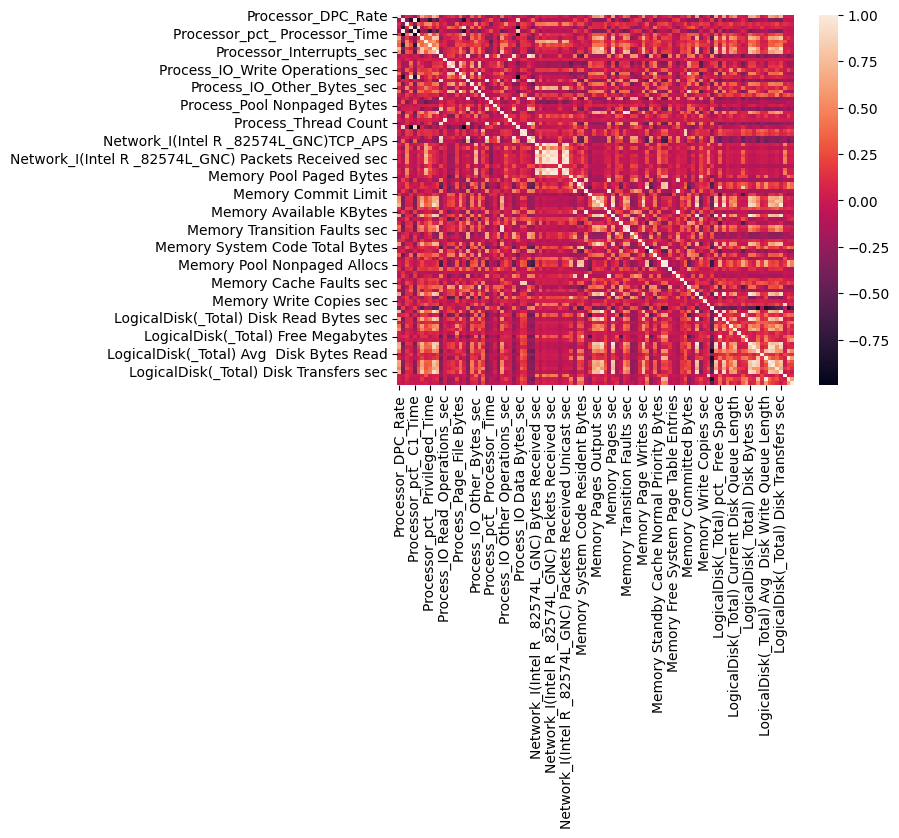

In [212]:
sns.heatmap(dfs.corr())

> ### Conclusions :
> As we can see, the Corolation matrix shows that there is a lot of corrolaions relationship between features.

In [229]:
(103+10)//10

11

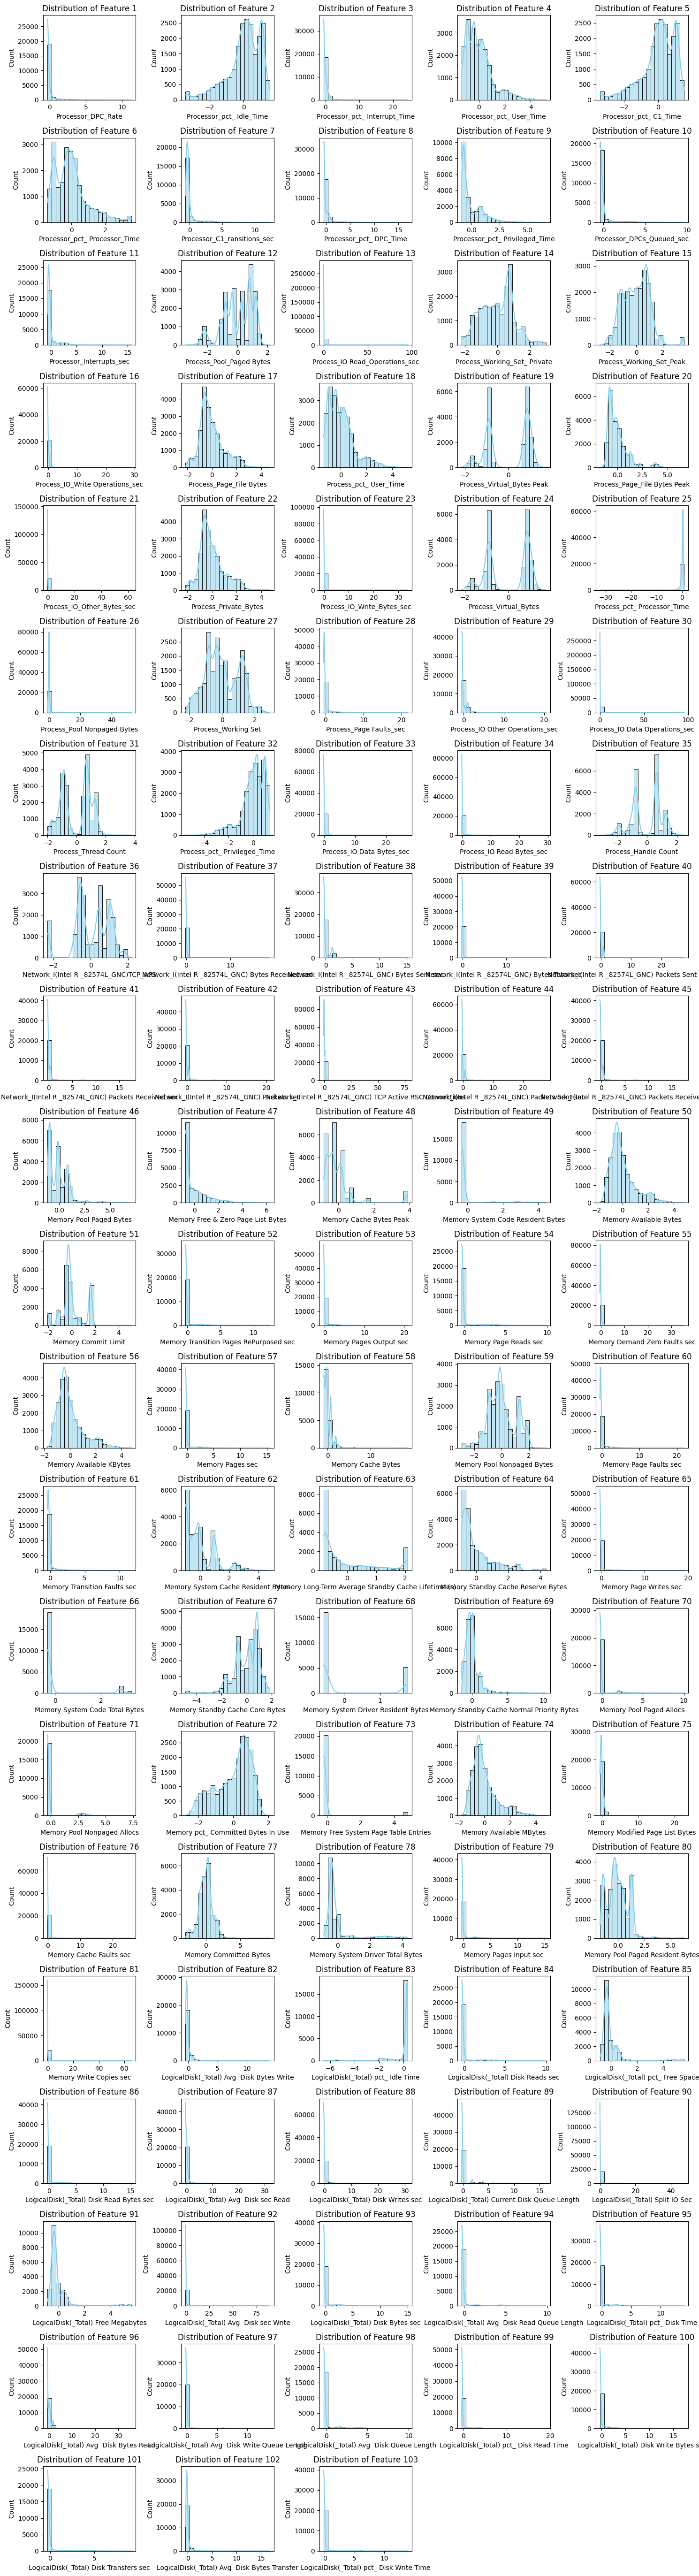

In [230]:
num_features = len(dfs.columns[:-1])

plt.figure(figsize=(15, ((num_features+10)//10)*5))

for i in range(num_features):
    plt.subplot((num_features+5)//5, 5, i + 1)

    sns.histplot(dfs.iloc[:, i], kde=True, bins=20, color='skyblue')

    plt.title(f'Distribution of Feature {i + 1}')

plt.tight_layout()

plt.show()

## Data Cleaning and Preprocessing :



### Handling outliers :

In [260]:
def rm_outliers_of(df_, col, threshold=0.90):
  upper_limit = df_.iloc[:, col].quantile(threshold)
  lower_limit = df_.iloc[:, col].quantile(1-threshold)
  return df_.loc[(df_.iloc[:, col] <= upper_limit) & (df_.iloc[:, col] >= lower_limit)]

In [330]:
dfout = dfs.copy()
for i in range(len(dfout.columns[:-1])):
  dfout = rm_outliers_of(dfout, i , 0.98)

In [331]:
def rm_stdlow_of(df_, col, threshold=0.1):
  if df_.iloc[:, col].describe()["std"] < threshold:
    df_ = df_.drop(columns=[df_.columns[col]])
  return df_

In [332]:
for i in range(len(dfout.columns[:-1])):
  try:
    dfout = rm_stdlow_of(dfout, i , 0.01)
  except:
    pass

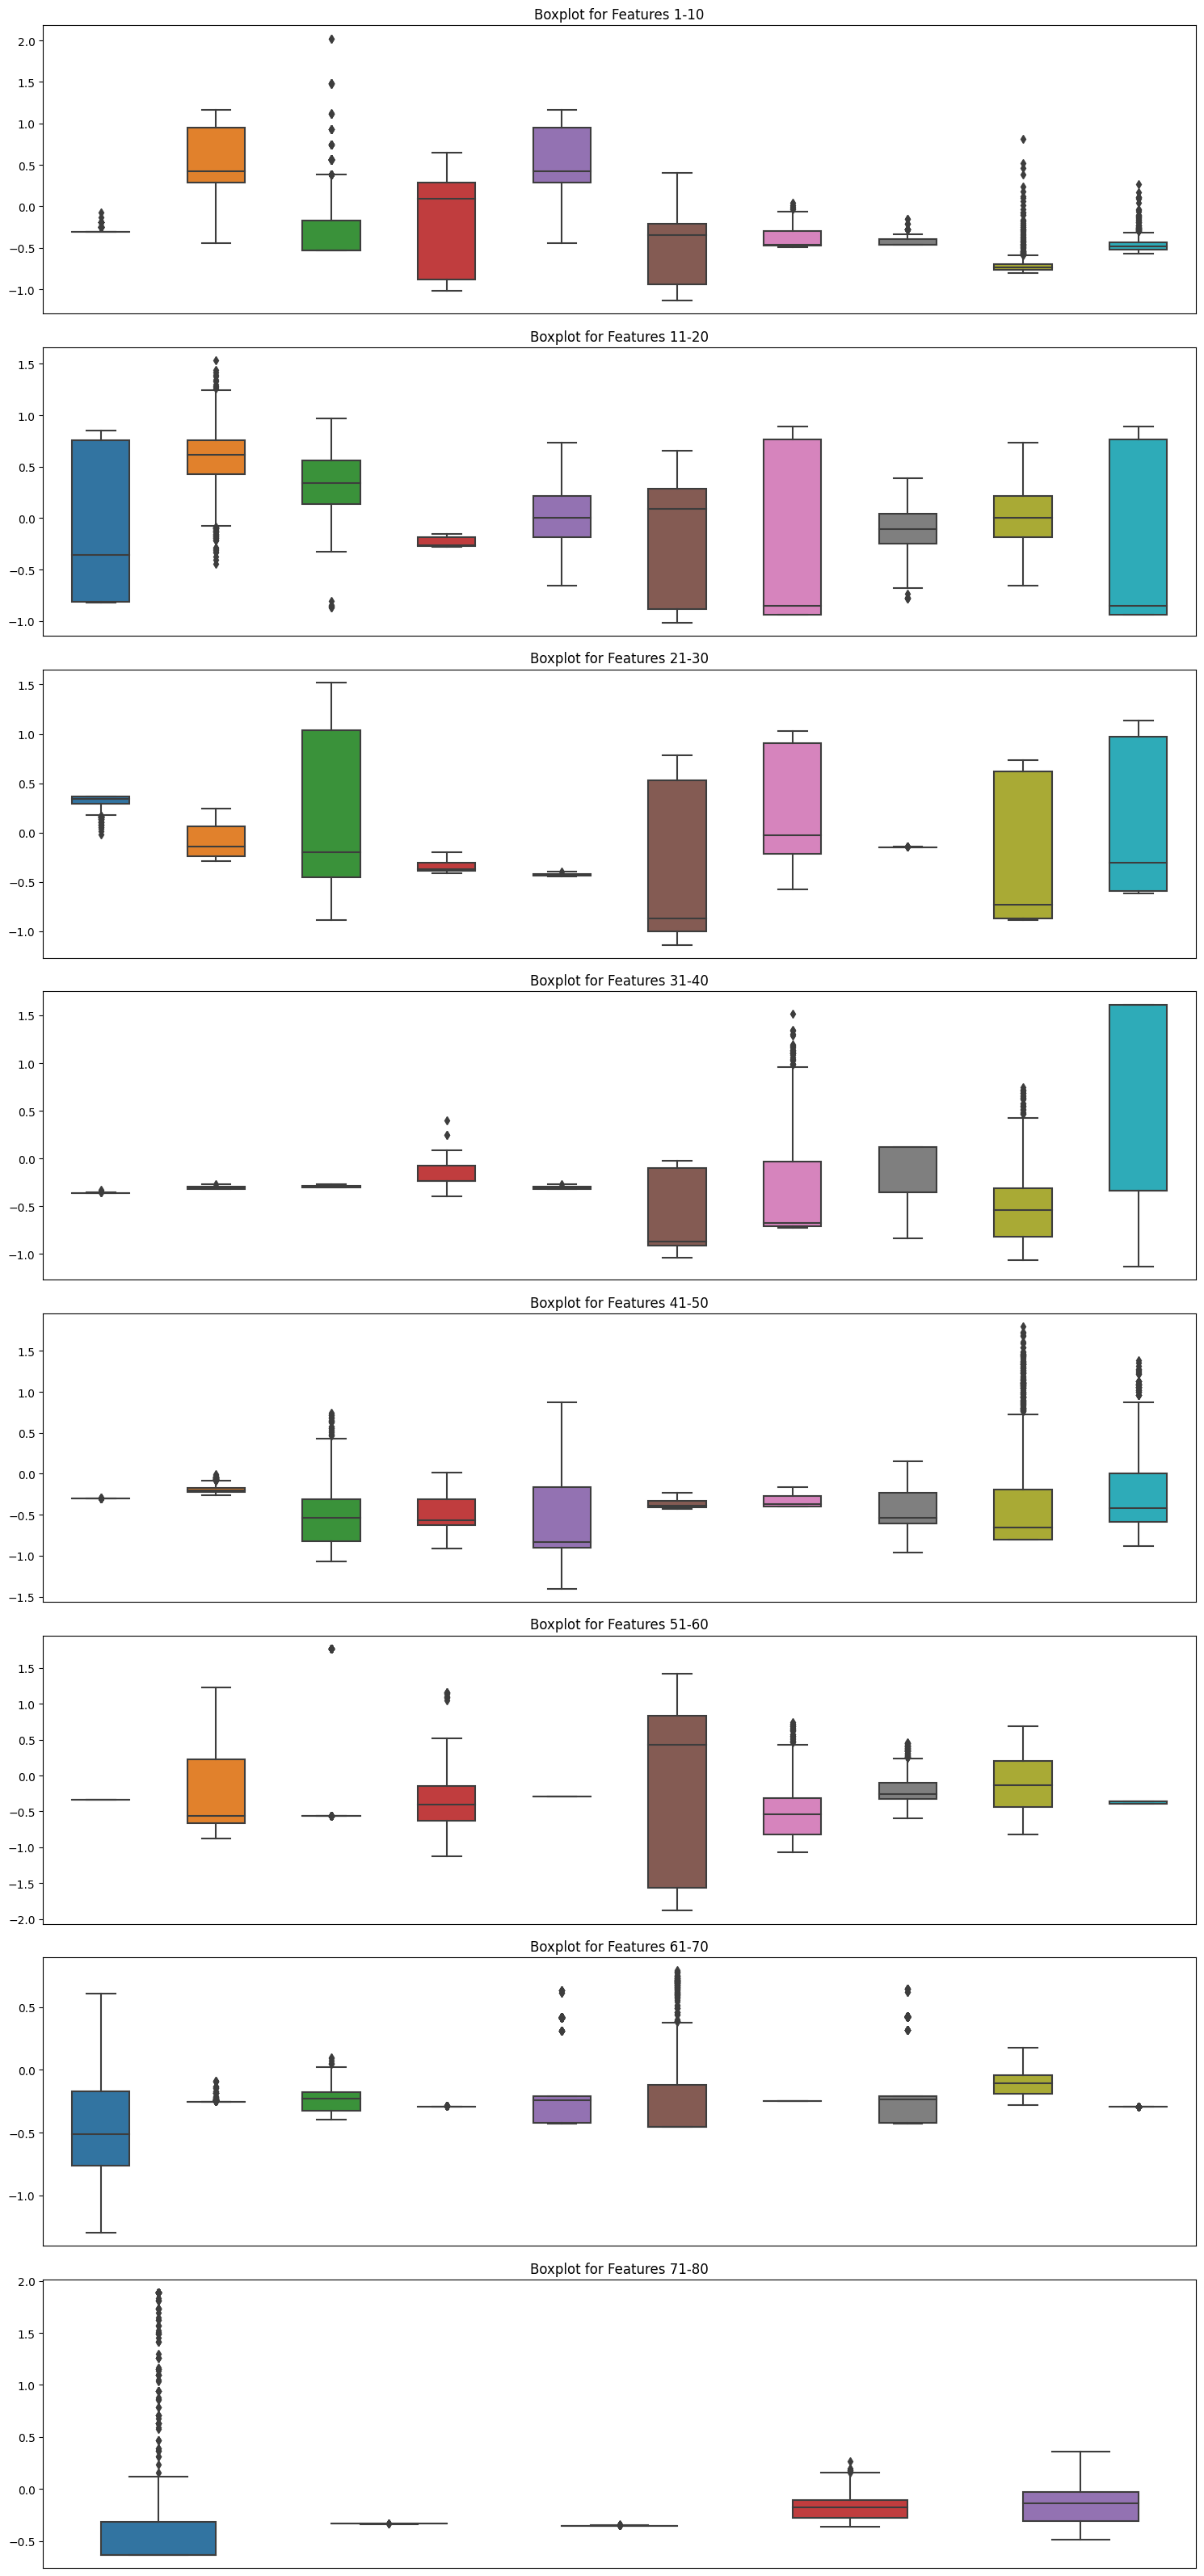

In [333]:
num_features = len(dfout.columns[:-1])
num_plots = 10

num_subplots = num_features // num_plots + (num_features % num_plots > 0)

plt.figure(figsize=(15, 4 * num_subplots))

for i in range(num_subplots):
    start_idx = i * num_plots
    end_idx = (i + 1) * num_plots

    plt.subplot(num_subplots, 1, i + 1)

    sns.boxplot(data=dfout.iloc[:, start_idx:end_idx], width=0.5)

    plt.xticks([])
    plt.title(f'Boxplot for Features {start_idx + 1}-{end_idx}')

plt.tight_layout()
plt.show()

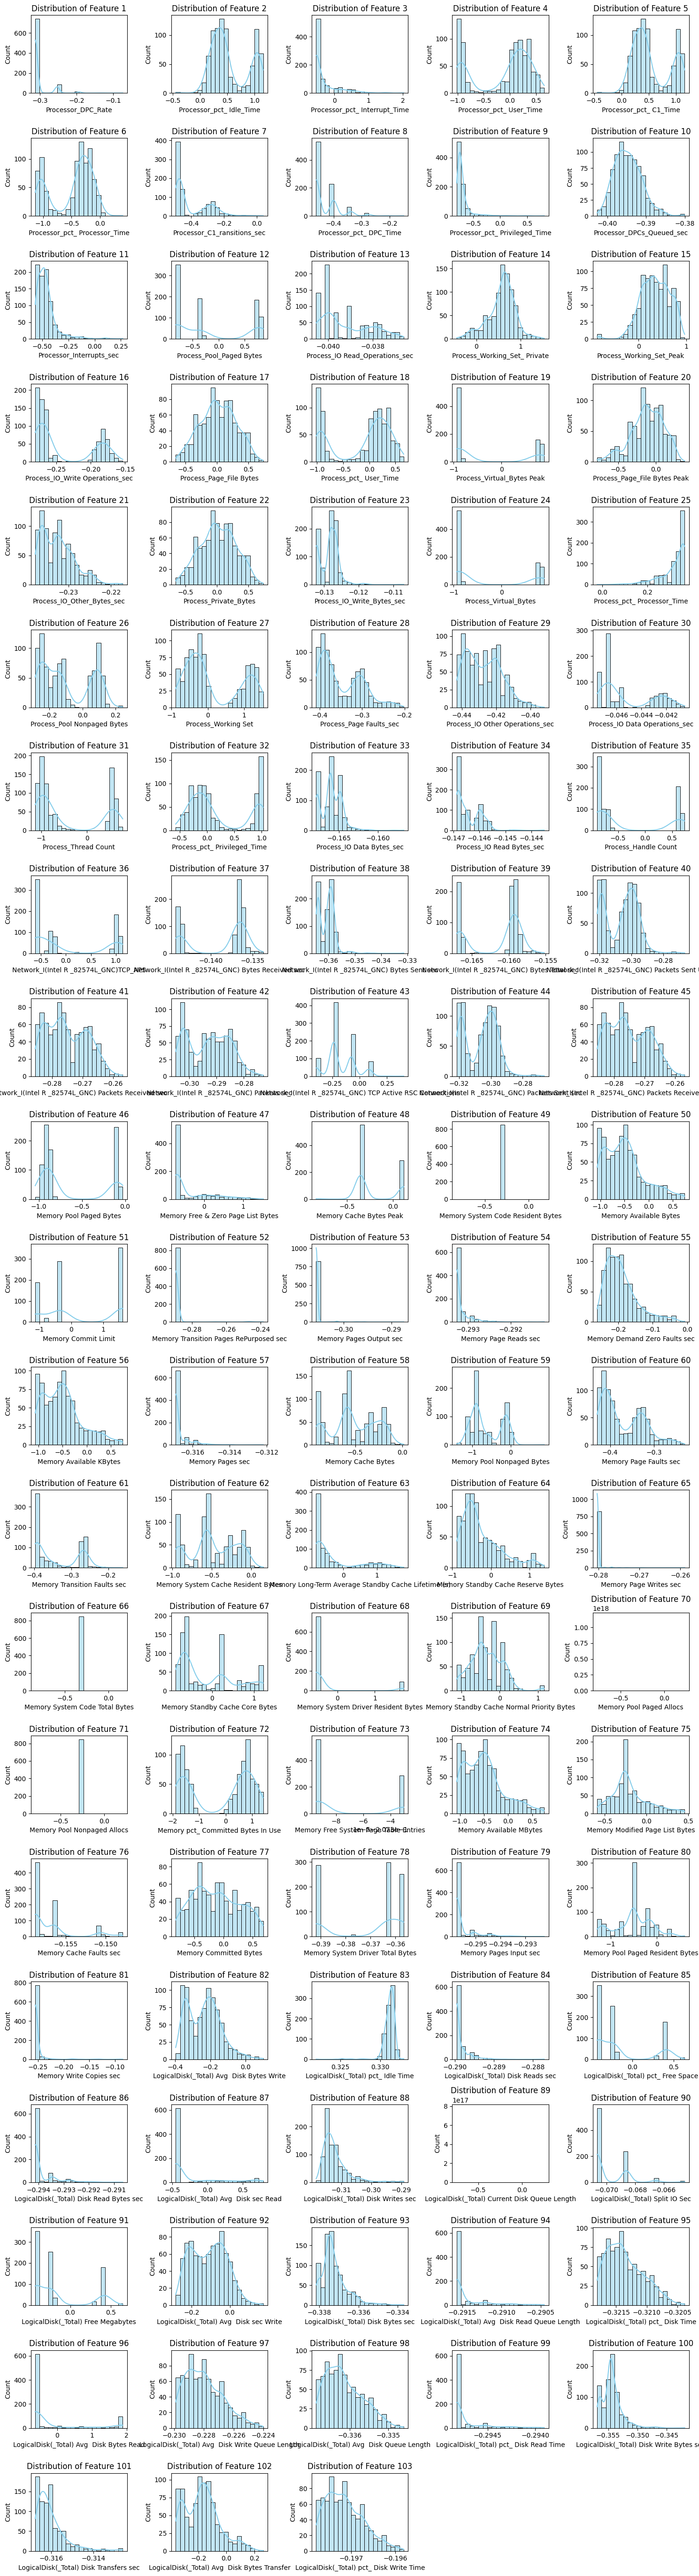

In [278]:
num_features = len(dfout.columns[:-1])

plt.figure(figsize=(15, ((num_features+10)//10)*5))

for i in range(num_features):
    plt.subplot((num_features+5)//5, 5, i + 1)

    sns.histplot(dfout.iloc[:, i], kde=True, bins=20, color='skyblue')

    plt.title(f'Distribution of Feature {i + 1}')

plt.tight_layout()

plt.show()

### Handle missing values, outliers, and inconsistencies in the data.

### Convert data types and handle categorical variables.


### Normalize or scale numerical features.

### Explore and understand the basic statistics of the dataset

## Feature Engineering

### Dimentinality reduction :

#### PCA :

#### t-SNE :

### Feature Selection :
check link  : https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

## Handle umbalanced data :

check link : https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/

## Model selection & Model Training :